# Experiment2 결과
실험 조건
- dataset: VocDetection2
- loss: YoloLoss1

In [8]:
import sys, os
sys.path.append('../YOLOv1')

import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import os
import cv2

from dataset import VOCDataset
from model import YOLOv1
from loss import YoloLoss1, YoloLoss2
from trainer import Trainer
from config import config

config = config()

config.batch_size = 16
config.lr = 2e-5
config.device='cuda'

config.print_interval = 50
config.model_dir = '../checkpoints/experiment3'
config.load_model_path = os.path.join(config.model_dir, 'YOLOv1_140epoch.pt')

config.dataset_dir = r'D:\AI\Dataset\VocDetection2'
config.img_dir = os.path.join(config.dataset_dir, 'images')
config.label_dir = os.path.join(config.dataset_dir, 'labels')
config.train_csv = os.path.join(config.dataset_dir, 'train.csv')
config.valid_csv = os.path.join(config.dataset_dir, 'valid.csv')

config.save_csv_path = os.path.join(config.model_dir, 'YOLOv1_result.csv')

train_dataset = VOCDataset(
    config.train_csv,
    config.img_dir,
    config.label_dir,
    config.img_size,
    config.S, config.B, config.C,
    config.test_transform,
)
valid_dataset = VOCDataset(
    config.valid_csv,
    config.img_dir,
    config.label_dir,
    config.img_size,
    config.S, config.B, config.C,
    config.test_transform,
)
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=config.batch_size,
    shuffle=False,
    drop_last=False,
)
valid_loader = DataLoader(
    dataset=valid_dataset,
    batch_size=config.batch_size,
    shuffle=False,
    drop_last=False,
)

# model = YOLOv1(config.S, config.B, config.C).to(config.device)
# optimizer = optim.Adam(model.parameters(), config.lr)
# crit = YoloLoss2(config.S, config.B, config.C)

# Train/Valid loss

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(config.save_csv_path)

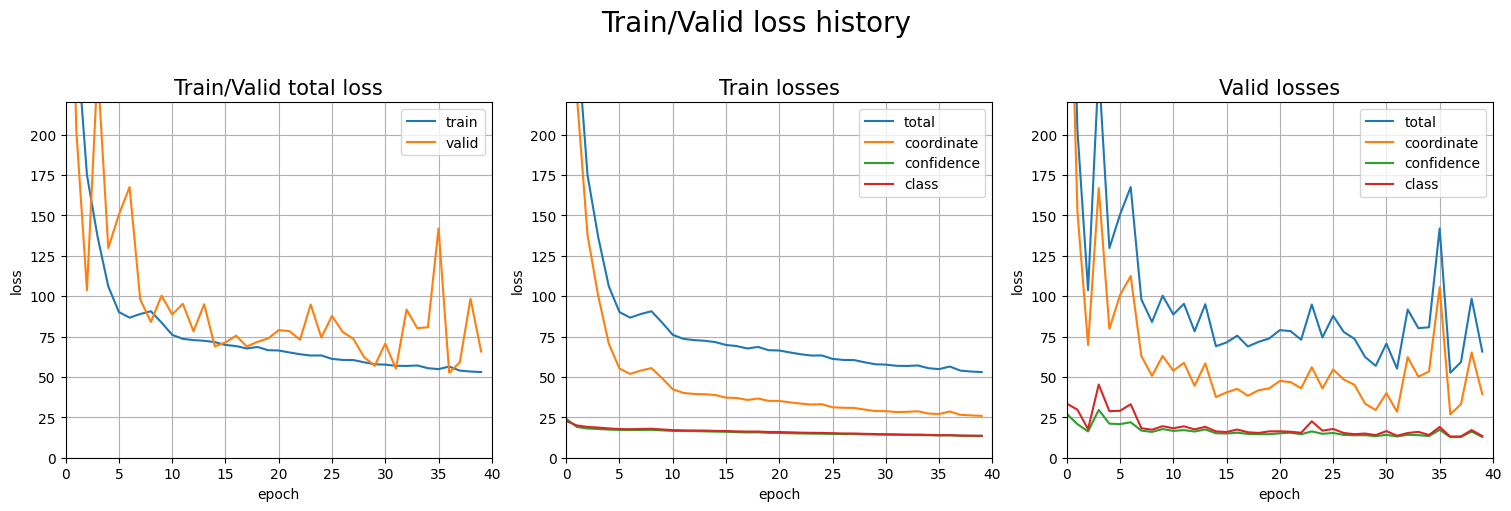

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True)
plt.suptitle('Train/Valid loss history\n', fontsize=20)
xlim = [0, 40]
ylim = [0, 220]

axes[0].plot(df['train_loss'])
axes[0].plot(df['valid_loss'])
axes[0].set_xlabel('epoch', fontsize=10)
axes[0].set_ylabel('loss', fontsize=10)
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)
axes[0].set_title('Train/Valid total loss', fontsize=15)
axes[0].legend(['train', 'valid'])
axes[0].grid(True, axis='both')



axes[1].plot(df['train_loss'])
axes[1].plot(df['train_loss_coord'])
axes[1].plot(df['train_loss_conf'])
axes[1].plot(df['train_loss_cls'])
axes[1].set_xlabel('epoch', fontsize=10)
axes[1].set_ylabel('loss', fontsize=10)
axes[1].set_xlim(xlim)
axes[1].set_ylim(ylim)
axes[1].set_title('Train losses', fontsize=15)
axes[1].legend(['total', 'coordinate', 'confidence', 'class'])
axes[1].grid(True, axis='both')



axes[2].plot(df['valid_loss'])
axes[2].plot(df['valid_loss_coord'])
axes[2].plot(df['valid_loss_conf'])
axes[2].plot(df['valid_loss_cls'])
axes[2].set_xlabel('epoch', size=10)
axes[2].set_ylabel('loss', size=10)
axes[2].set_xlim(xlim)
axes[2].set_ylim(ylim)
axes[2].set_title('Valid losses', fontsize=15)
axes[2].legend(['total', 'coordinate', 'confidence', 'class'])
axes[2].grid(True, axis='both')

- 학습 중 loss는 지속적으로 내려가나 아래를 보면 AP score가 0 이상으로 올라오지 않음

# AP/mAP

In [11]:
class_names = config.voc_classes

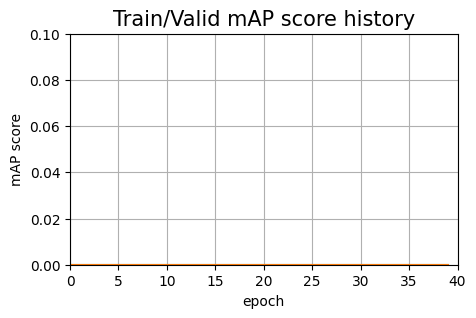

In [12]:
xlim = [0, 40]
ylim = [0, 0.1]

plt.figure(figsize=(5, 3))
plt.plot(df['train_mAP'])
plt.plot(df['valid_mAP'])
plt.xlabel('epoch', fontsize=10)
plt.ylabel('mAP score', fontsize=10)
plt.title('Train/Valid mAP score history', fontsize=15)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid(True)

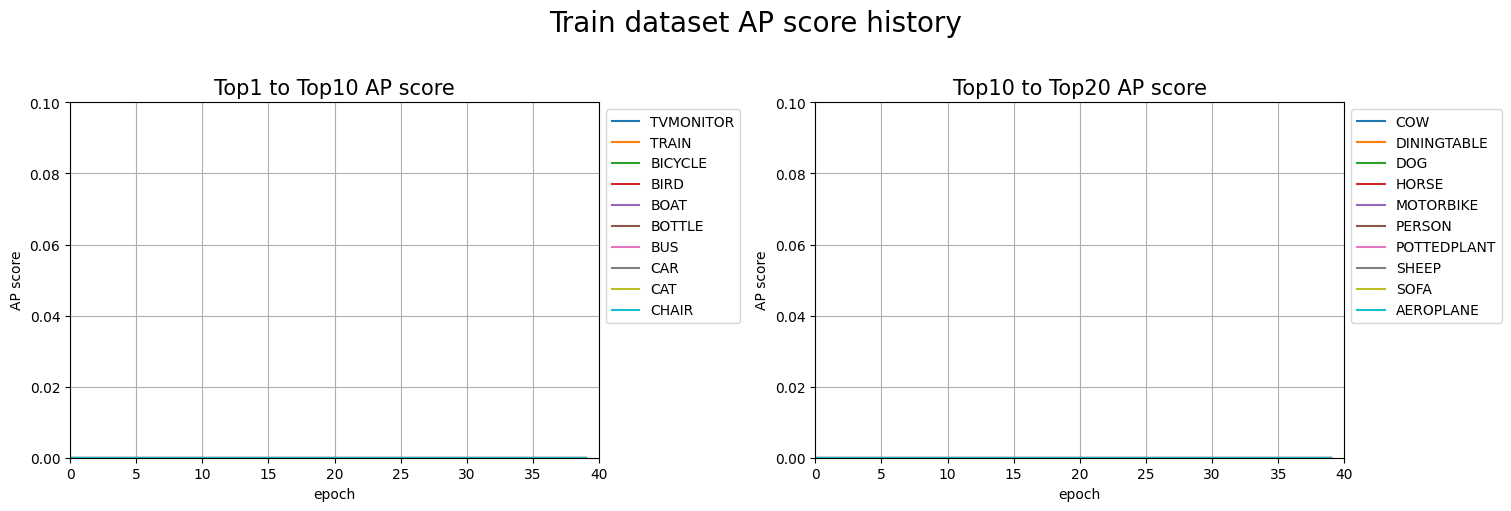

In [13]:
# 마지막 epoch 기준 train dataset AP score 내림차순 정렬
indices = np.argsort(df.iloc[-1, 5:25].values)[::-1]

fig, axes = plt.subplots(1, 2, figsize=(15,5), constrained_layout=True)
plt.suptitle('Train dataset AP score history\n', fontsize=20)
xlim = [0, 40]
ylim = [0, 0.1]

legend = []
for i in indices[:10]:
    axes[0].plot(df.iloc[:, 5+i])
    legend.append(class_names[i])

axes[0].set_xlabel('epoch', fontsize=10)
axes[0].set_ylabel('AP score', fontsize=10)
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)
axes[0].set_title('Top1 to Top10 AP score', fontsize=15)
axes[0].legend(legend, loc='upper left', bbox_to_anchor=(1.0, 1.0))
axes[0].grid(True, axis='both')

legend = []
for i in indices[10:20]:
    axes[1].plot(df.iloc[:, 5+i])
    legend.append(class_names[i])

axes[1].set_xlabel('epoch', fontsize=10)
axes[1].set_ylabel('AP score', fontsize=10)
axes[1].set_xlim(xlim)
axes[1].set_ylim(ylim)
axes[1].set_title('Top10 to Top20 AP score', fontsize=15)
axes[1].legend(legend, loc='upper left', bbox_to_anchor=(1.0, 1.0))
axes[1].grid(True, axis='both')

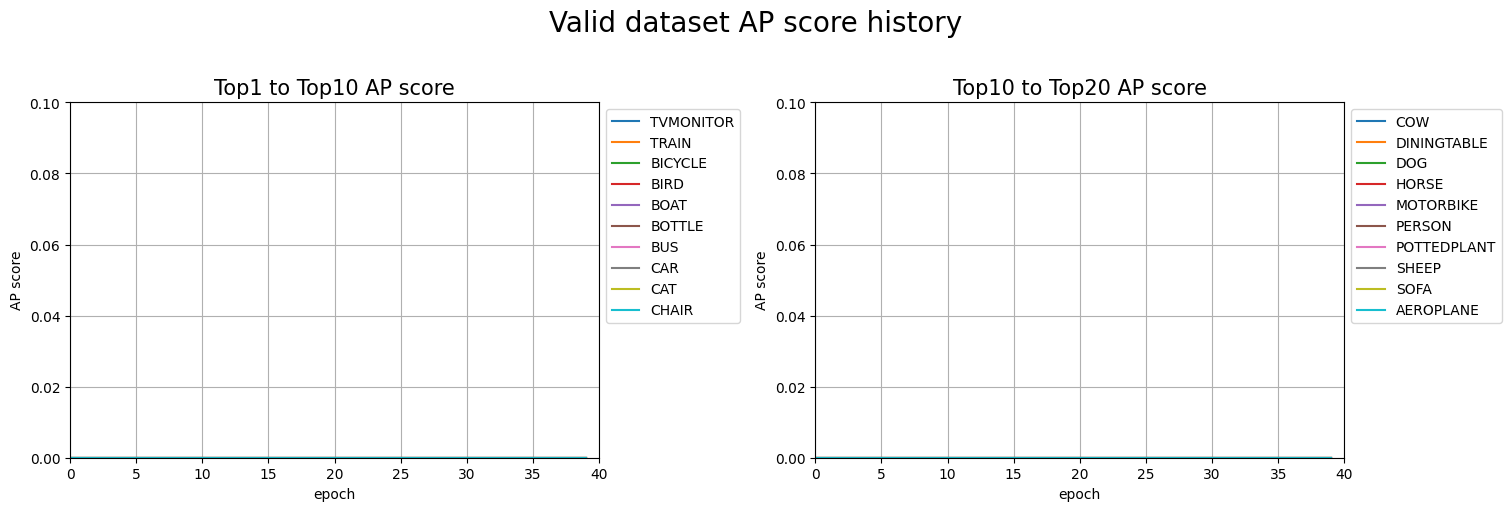

In [14]:
# 마지막 epoch 기준 train dataset AP score 내림차순 정렬
indices = np.argsort(df.iloc[-1, 30:50].values)[::-1]

fig, axes = plt.subplots(1, 2, figsize=(15,5), constrained_layout=True)
plt.suptitle('Valid dataset AP score history\n', fontsize=20)
xlim = [0, 40]
ylim = [0, 0.1]

legend = []
for i in indices[:10]:
    axes[0].plot(df.iloc[:, 30+i])
    legend.append(class_names[i])

axes[0].set_xlabel('epoch', fontsize=10)
axes[0].set_ylabel('AP score', fontsize=10)
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)
axes[0].set_title('Top1 to Top10 AP score', fontsize=15)
axes[0].legend(legend, loc='upper left', bbox_to_anchor=(1.0, 1.0))
axes[0].grid(True, axis='both')

legend = []
for i in indices[10:20]:
    axes[1].plot(df.iloc[:, 30+i])
    legend.append(class_names[i])

axes[1].set_xlabel('epoch', fontsize=10)
axes[1].set_ylabel('AP score', fontsize=10)
axes[1].set_xlim(xlim)
axes[1].set_ylim(ylim)
axes[1].set_title('Top10 to Top20 AP score', fontsize=15)
axes[1].legend(legend, loc='upper left', bbox_to_anchor=(1.0, 1.0))
axes[1].grid(True, axis='both')

- AP score가 전부 0만 출력하는 것을 보여주는데 이것은 bbox predictor가 0을 출력하도록 학습되었기 때문임